# *ПРАКТИКУМ*

# **ПРОЕКТ: Первое построение модели машинного обучения**

# Выполнил: *Мирослав.*

# email: *m*

# Дата: 03.2023

## Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.


## Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.\
 Известно:\
сalls — количество звонков,\
minutes — суммарная длительность звонков в минутах,\
messages — количество sms-сообщений,\
mb_used — израсходованный интернет-трафик в Мб,\
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [1]:
import pandas as pd
import numpy as np
from io import StringIO

In [2]:
import random 
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на тарифы «Смарт» или «Ультра». Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

Построить модель с максимально большим значением *accuracy*.

## Откроем и изучим файл

In [4]:
try:
    df = pd.read_csv('N:\\Файлы Jupiter\\users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


### Вывод 
Датасет состоит из 5 колонок, без пропущенных значений. Данные в колонках calls, minutes, messages, mb_used относятся к непрерывным, в колонке is_ultra - категориальные.

## Разбъем данные на выборки

In [6]:
df_train, df_test = train_test_split(df, test_size=0.40, random_state=12345)
df_test, df_valid = train_test_split(df_test, test_size=0.50, random_state=12345)

*Создаем переменные в которых содержатся обучающие параметры и целевой (или целевые) признак. Т.е. создаем три пары переменных: для обучения, валидации(проверки) и тестирования*

In [7]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


## Исследуем модели

*Здесь мы исследуем модель, т.е. какой максимальный Accuracy она дает и какой гиперпараметр наиболее оптимальный. Первую модель обучаем только на тренировочной выборке. Валидационная выборка используется для  подбора оптимального набора гиперпараметров модели, а тестовая - для финальной проверки качества модели.*

### Решающее дерево

In [8]:
best_model = None
best_result = 0
data = []
for depth in range(1, 11):
	model = DecisionTreeClassifier(random_state=12358, max_depth=depth) # обучите модель с заданной глубиной дерева
	model.fit(features_train, target_train) 
	predictions = model.predict(features_train) 
	result = accuracy_score(target_train, predictions) 
	if result > best_result:
		best_model = model
		best_result = result
		best_depth = depth
		data.append([best_depth, best_result])
	print(f'max_depth : {depth} = {result}')
df = pd.DataFrame(data, columns=['depth', 'result'])	

max_depth : 1 = 0.7577800829875518
max_depth : 2 = 0.7878630705394191
max_depth : 3 = 0.8075726141078838
max_depth : 4 = 0.8106846473029046
max_depth : 5 = 0.8200207468879668
max_depth : 6 = 0.8376556016597511
max_depth : 7 = 0.8552904564315352
max_depth : 8 = 0.8620331950207469
max_depth : 9 = 0.8812240663900415
max_depth : 10 = 0.8900414937759336


In [9]:
print('РЕЗУЛЬТАТ:')
print("Accuracy лучшей модели:", best_result, "Максимальная глубина:", best_depth)
'''Примечание:\
 при обучении на тренировочной выборке модель заучивает ответы и Accuracy растет с увеличением глубины дерева.\
Это не хорошо. Нужно проверять на валидационной выборке'''

РЕЗУЛЬТАТ:
Accuracy лучшей модели: 0.8900414937759336 Максимальная глубина: 10


'Примечание: при обучении на тренировочной выборке модель заучивает ответы и Accuracy растет с увеличением глубины дерева.Это не хорошо. Нужно проверять на валидационной выборке'

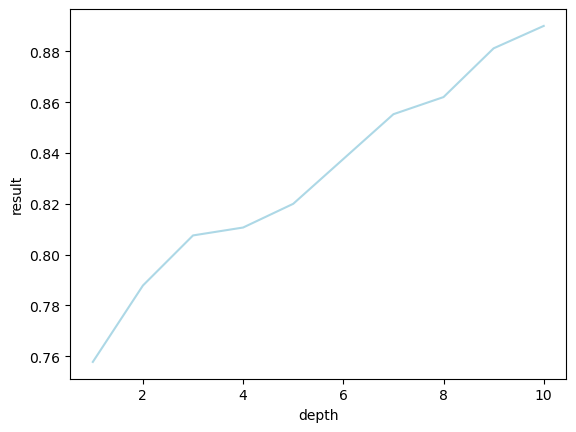

In [10]:
sns.lineplot(x='depth', y='result', data=df, color='lightblue');

In [11]:
best_model_tree = None
best_result_tree = 0
data_tree = []
for depth in range(1, 11):
	for criterion in ['gini', 'entropy']:
		for splitter in ['best', 'random']:
			model_tree = DecisionTreeClassifier(random_state=12358, max_depth=depth, criterion=criterion, splitter=splitter) 
			model_tree.fit(features_train, target_train) 
			predictions_valid = model_tree.predict(features_valid) 
			result_tree = accuracy_score(target_valid, predictions_valid)
			data_tree.append([depth, result_tree])
			if result_tree > best_result_tree:
				best_model_tree = model_tree
				best_result_tree = result_tree
				best_depth = depth
				best_criterion = criterion
				best_splitter = splitter
				
df_tree = pd.DataFrame(data_tree, columns=['depth', 'result_tree'])

In [12]:
print('РЕЗУЛЬТАТ:')
print(f'Accuracy наилучшей модели на валидационной выборке: {round(best_result_tree, 4)}')
print(f'ГИПЕРПАРАМЕТРЫ:')
print(f'Оптимальная глубина решающего дерева {best_depth}')
print(f'Оптимальный критерий качества разделения: {best_criterion}')
print(f'Оптимальная стратегия разделения на каждом узле: {best_splitter}')

РЕЗУЛЬТАТ:
Accuracy наилучшей модели на валидационной выборке: 0.7978
ГИПЕРПАРАМЕТРЫ:
Оптимальная глубина решающего дерева 8
Оптимальный критерий качества разделения: entropy
Оптимальная стратегия разделения на каждом узле: best


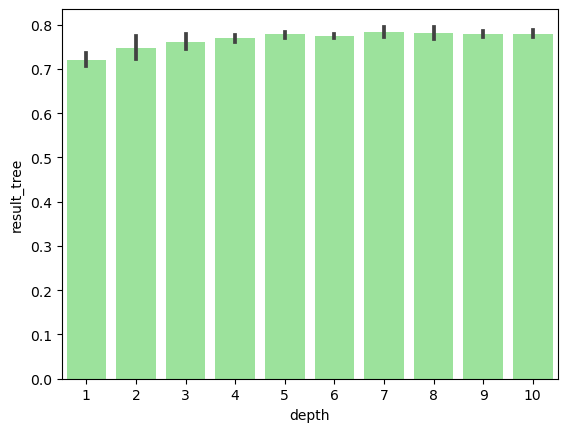

In [13]:
sns.barplot(x='depth', y='result_tree', data=df_tree, color='lightgreen');

### Случайный лес

In [14]:
best_model_forest = None
best_result_forest = 0
best_est = 0
best_depth = 0
data_forest = []
for est in range(15, 26, 1):
    for depth in range (1, 11):
        for criterion in ['gini', 'entropy']:
            for max_features in ['sqrt', 'log2', None]:
                for bootstrap in [True, False]:
                    model_forest = RandomForestClassifier(random_state=12358, n_estimators=est, max_depth=depth, criterion=criterion,\
                                                              max_features=max_features, bootstrap=bootstrap)                                                                                
                    model_forest.fit(features_train, target_train) 
                    predictions_valid = model_forest.predict(features_valid) 
                    result_forest = accuracy_score(target_valid, predictions_valid) 
                    data_forest.append([est, depth, criterion, max_features, bootstrap, result_forest])
                    if result_forest > best_result_forest:
                        best_model_forest = model_forest
                        best_result_forest = result_forest
                        best_est = est
                        best_depth = depth 
                        best_criterion = criterion 
                        best_max_features = max_features
                        best_bootstrap = bootstrap

In [15]:
df_forest = pd.DataFrame(data_forest, columns=['est', 'depth', 'criterion', 'max_features', 'bootstrap', 'result_forest'])

In [16]:
print('РЕЗУЛЬТАТ:')
print(f'Accuracy наилучшей модели на валидационной выборке: {round(best_result_forest, 4)}')
print(f'ГИПЕРПАРАМЕТРЫ:')
print(f'Оптимальное количество деревьев: {best_est}')
print(f'Оптимальная глубина решающего дерева: {best_depth}')
print(f'Оптимальный критерий качества разделения: {best_criterion}')
print(f'Оптимальное количество функций, которые следует учитывать при поиске наилучшего разделения: {best_max_features}')
print(f'Если True - используются образцы начальной загрузки при построении деревьев.\
Если False - используется весь набор данных.: {best_bootstrap}')

РЕЗУЛЬТАТ:
Accuracy наилучшей модели на валидационной выборке: 0.8134
ГИПЕРПАРАМЕТРЫ:
Оптимальное количество деревьев: 21
Оптимальная глубина решающего дерева: 8
Оптимальный критерий качества разделения: gini
Оптимальное количество функций, которые следует учитывать при поиске наилучшего разделения: sqrt
Если True - используются образцы начальной загрузки при построении деревьев.Если False - используется весь набор данных.: True


### Логистическая регрессия

In [17]:
best_lreg_model = None
best_result_lreg = 0
for max_iter in range(1, 100):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
        model_lreg = LogisticRegression(random_state=12358, solver=solver, max_iter=max_iter) 
        model_lreg.fit(features_train, target_train)
        predictions_valid = model_lreg.predict(features_valid) 
        result_lreg = model_lreg.score(features_valid, target_valid)
        if result_lreg > best_result_lreg:
            best_lreg_model = model_lreg
            best_result_lreg = result_lreg
            best_max_iter = max_iter
            best_solver = solver

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of itera

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of itera

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of itera

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conv

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

In [18]:
print('РЕЗУЛЬТАТ:')
print(f'Результат оптимального варианта модели на валидационной выборке: {round(best_result_lreg, 4)}')
print(f'ГИПЕРПАРАМЕТРЫ:')
print(f'Оптимальный алгоритм для использования в задаче оптимизации: {best_solver}')
print(f'Максимальное количество итераций, необходимых для сходимости алгоритма оптимизации: {best_max_iter}')

РЕЗУЛЬТАТ:
Результат оптимального варианта модели на валидационной выборке: 0.7418
ГИПЕРПАРАМЕТРЫ:
Оптимальный алгоритм для использования в задаче оптимизации: newton-cg
Максимальное количество итераций, необходимых для сходимости алгоритма оптимизации: 40


*Построим графики зависимости метрики от гиперпараметров для оптимальной модели*

(0.7, 0.82)

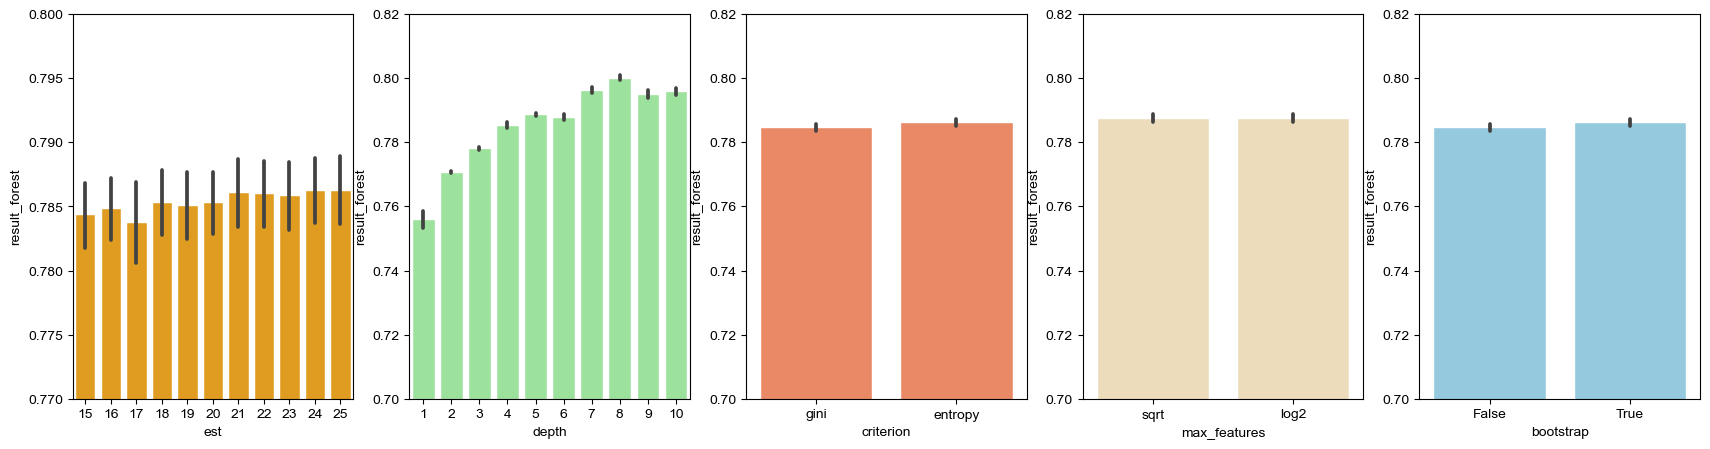

In [19]:
fig, axs = plt.subplots(ncols=5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig.set_size_inches(21,5)

sns.barplot(x='est', y='result_forest', data=df_forest, color='orange', ax=axs[0]);
axs[0].set_ylim([.77,.8])
sns.barplot(x='depth', y='result_forest', data=df_forest, color='lightgreen', ax=axs[1]);
axs[1].set_ylim([.7,.82])
sns.barplot(x='criterion', y='result_forest', data=df_forest, color='coral', ax=axs[2]);
axs[2].set_ylim([.7,.82])
sns.barplot(x='max_features', y='result_forest', data=df_forest, color='wheat', ax=axs[3]);
axs[3].set_ylim([.7,.82])
sns.barplot(x='bootstrap', y='result_forest', data=df_forest, color='skyblue', ax=axs[4]);
axs[4].set_ylim([.7,.82])

## Проверим модель на тестовой выборке

*Для окончательной проверки модели на переобученность или недообученность проверим ее на тестовой выборке*

In [20]:
model_test = RandomForestClassifier(random_state=12358, n_estimators=21, max_depth=8)
model_test.fit(features_train, target_train) 
predictions_test = model_test.predict(features_test) 
result_test = accuracy_score(target_test, predictions_test) 

print("Результат наилучшей модели на тестовой выборке:", result_test)

Результат наилучшей модели на тестовой выборке: 0.8040435458786936


*Результат: проверка на тестовой выборке показала хороший результат и показатель accuracy составил 0,804, при ранее выявленных оптимальных гиперпараметрах best_depth = 8 и best_est = 21.*

## Проверим модель на адекватность

*Необходимо всегда сравнивать модель со случайной, так мы сможем оценить её адекватность, или проверить на вменяемость (англ. sanity check).*

In [21]:
model_dum = DummyClassifier(strategy="most_frequent", random_state=12358)
model_dum.fit(features_train, target_train) 
predictions_test = model_dum.predict(features_test) 
result_dum = model_dum.score(features_test, target_test) 

print("Результат наилучшей модели на тестовой выборке:", result_dum)

Результат наилучшей модели на тестовой выборке: 0.7060653188180405


*Результат: при оценке на адекватность важно, чтобы результат не был менее доли положительных значений в проверочной выборке или менее 0,5 (50 % т.е. случайного ответа)*

## Общий вывод

В  проекте нужно было построить модель для задачи классификации, которая выберет подходящий тариф мобильной связи.
В задачу входило — построить модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75.

Для исследования был предоставлен датасет с данными о поведении клиентов, которые уже перешли на эти тарифы. Датасет состоит из 5 колонок и 3214 строк. Типы данных в датасете: int64 и float64. В колонках категориального и непрерывного типа пропуски значений не встречались. Предобработка не потребовалась.

В прцессе исследования было выполнено:
- разделение исходных данных на обучающую, валидационную и тестовую выборки;
- исследовано качество разных моделей, в зависимости от гиперпараметров;
- проверка качества модели на тестовой выборке;
- проверка модели на вменяемость.

В результате было установлено:
- наиболшее значение параметра качества - accuracy было у модели Случайный лес (RandomForestClassifier). Максимальное значение Accuracy для этой модели составляет 0,8134, при гиперпараметрах: глубина решающего дерева best_depth = 8, количество деревьев best_est = 21;
- проверка качества модели на тестовой выборке показала хороший результат и показатель accuracy составил 0,804, при ранее выявленных оптимальных гиперпараметрах best_depth = 8 и best_est = 21;
- проверка на адекватность показала, что модель адекватна и реалистична.

В результате данное исследование позволит построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
